In [1]:
import pandas as pd
import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv('dataset_phishing.csv')

In [3]:
df.shape

(11430, 89)

In [4]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [6]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [7]:
df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [8]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [9]:
# Drop columns with too many missing values
df= df.dropna(thresh=0.7 * len(df), axis=1)
df.shape

(11430, 89)

In [10]:
#change int dtype with legitimate as 0 and phishing as 1
mapping = {'legitimate':0, 'phishing':1}

df['status'] = df['status'].map(mapping)

In [11]:
df['status'].value_counts()

status
0    5715
1    5715
Name: count, dtype: int64

In [12]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
length_url,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,0.621745,...,0.125159,-0.006476,-0.007082,0.002799,-0.006798,0.072205,0.023357,0.236395,-0.102582,0.248580
length_hostname,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,0.183405,...,0.217284,0.074707,-0.097794,-0.041081,0.013854,0.163238,-0.023344,0.213990,-0.159342,0.238322
ip,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,0.440972,...,0.137716,0.014561,0.053246,-0.108869,-0.077020,0.167930,0.127823,0.270743,-0.218968,0.321698
nb_dots,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,0.414902,...,0.107789,0.055560,0.056407,-0.024117,-0.007818,0.087969,0.126659,0.209616,-0.097312,0.207029
nb_hyphens,0.399564,0.057702,0.109860,0.045099,1.000000,0.018770,0.036804,0.120487,NaN,0.107050,...,0.006909,0.020297,-0.055794,0.038163,0.080104,-0.041464,-0.031477,-0.018828,0.104341,-0.100107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web_traffic,0.072205,0.163238,0.167930,0.087969,-0.041464,-0.009459,0.143777,0.164797,NaN,0.187809,...,0.081786,0.083888,0.022598,-0.110435,-0.096698,1.000000,-0.007113,0.034099,-0.209526,0.060388
dns_record,0.023357,-0.023344,0.127823,0.126659,-0.031477,0.031611,0.009441,0.076372,NaN,0.052159,...,0.062084,0.043817,0.213899,-0.060811,-0.068023,-0.007113,1.000000,0.096413,-0.142135,0.122119
google_index,0.236395,0.213990,0.270743,0.209616,-0.018828,0.113217,0.201260,0.129093,NaN,0.167385,...,0.267465,-0.143655,0.040633,-0.134656,-0.210111,0.034099,0.096413,1.000000,-0.389887,0.731171
page_rank,-0.102582,-0.159342,-0.218968,-0.097312,0.104341,-0.066356,-0.123852,-0.126164,NaN,-0.133089,...,-0.330810,0.058843,-0.155990,0.345751,0.589602,-0.209526,-0.142135,-0.389887,1.000000,-0.511137


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

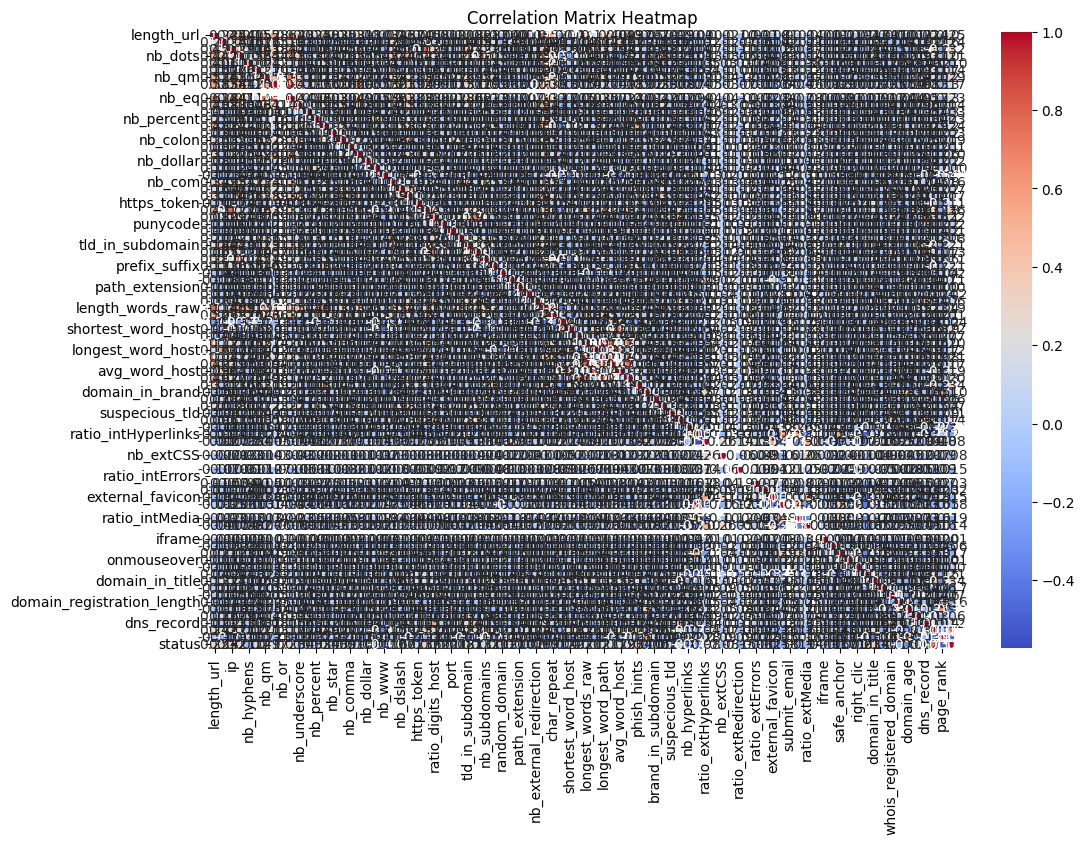

In [14]:
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
# Drop irrelevant columns
irrelevant_columns = ['url']
df = df.drop(columns=irrelevant_columns, errors="ignore")

In [16]:
df.dtypes

length_url         int64
length_hostname    int64
ip                 int64
nb_dots            int64
nb_hyphens         int64
                   ...  
web_traffic        int64
dns_record         int64
google_index       int64
page_rank          int64
status             int64
Length: 88, dtype: object

In [17]:
target_corr = corr_matrix['status']
target_corr

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
status             1.000000
Name: status, Length: 88, dtype: float64

In [18]:

# Identify highly correlated features (threshold > 0.9)
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:  # Check correlation threshold
            colname = corr_matrix.columns[i]  # Get the feature name
            correlated_features.add(colname)

# Drop highly correlated features from the dataset
df = df.drop(columns=correlated_features, errors="ignore")


In [19]:
df.shape

(11430, 86)

In [20]:
corr_matrix2 = df.corr(numeric_only=True)
corr_matrix2

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_underscore,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
length_url,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,0.429044,...,0.125159,-0.006476,-0.007082,0.002799,-0.006798,0.072205,0.023357,0.236395,-0.102582,0.248580
length_hostname,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,0.080657,...,0.217284,0.074707,-0.097794,-0.041081,0.013854,0.163238,-0.023344,0.213990,-0.159342,0.238322
ip,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,0.197964,...,0.137716,0.014561,0.053246,-0.108869,-0.077020,0.167930,0.127823,0.270743,-0.218968,0.321698
nb_dots,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,0.329238,...,0.107789,0.055560,0.056407,-0.024117,-0.007818,0.087969,0.126659,0.209616,-0.097312,0.207029
nb_hyphens,0.399564,0.057702,0.109860,0.045099,1.000000,0.018770,0.036804,0.120487,NaN,0.042333,...,0.006909,0.020297,-0.055794,0.038163,0.080104,-0.041464,-0.031477,-0.018828,0.104341,-0.100107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web_traffic,0.072205,0.163238,0.167930,0.087969,-0.041464,-0.009459,0.143777,0.164797,NaN,0.088783,...,0.081786,0.083888,0.022598,-0.110435,-0.096698,1.000000,-0.007113,0.034099,-0.209526,0.060388
dns_record,0.023357,-0.023344,0.127823,0.126659,-0.031477,0.031611,0.009441,0.076372,NaN,0.055159,...,0.062084,0.043817,0.213899,-0.060811,-0.068023,-0.007113,1.000000,0.096413,-0.142135,0.122119
google_index,0.236395,0.213990,0.270743,0.209616,-0.018828,0.113217,0.201260,0.129093,NaN,0.072959,...,0.267465,-0.143655,0.040633,-0.134656,-0.210111,0.034099,0.096413,1.000000,-0.389887,0.731171
page_rank,-0.102582,-0.159342,-0.218968,-0.097312,0.104341,-0.066356,-0.123852,-0.126164,NaN,0.013343,...,-0.330810,0.058843,-0.155990,0.345751,0.589602,-0.209526,-0.142135,-0.389887,1.000000,-0.511137


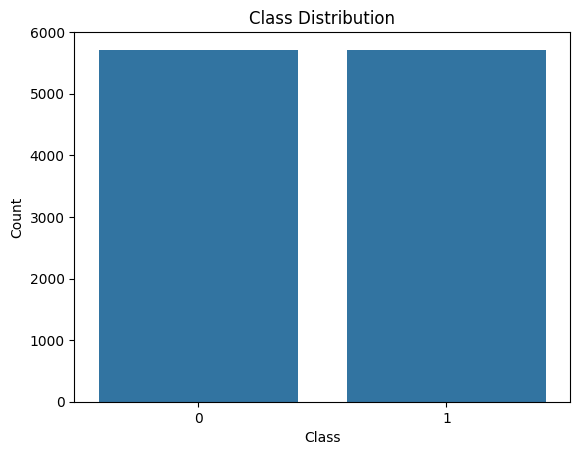

In [21]:
# Assuming 'target' is the column containing the class labels (0: legitimate, 1: phishing)
sns.countplot(x='status', data=df)  # df is your DataFrame
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [22]:
df.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_underscore', 'nb_tilde', 'nb_percent',
       'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn',
       'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash',
       'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host',
       'punycode', 'port', 'tld_in_path', 'tld_in_subdomain',
       'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain',
       'shortening_service', 'path_extension', 'nb_redirection',
       'nb_external_redirection', 'length_words_raw', 'char_repeat',
       'shortest_words_raw', 'shortest_word_host', 'shortest_word_path',
       'longest_words_raw', 'longest_word_host', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
    

In [23]:
target_corr2 = corr_matrix2['status']
target_corr2

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
status             1.000000
Name: status, Length: 86, dtype: float64

In [24]:
#only choose features with abs value > 0.1
threshold= 0.1
relevant_features = target_corr2[abs(target_corr2)>threshold].index.tolist()
relevant_features

['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_hyphens',
 'nb_at',
 'nb_qm',
 'nb_and',
 'nb_slash',
 'nb_semicolumn',
 'nb_www',
 'nb_com',
 'https_token',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'abnormal_subdomain',
 'nb_subdomains',
 'prefix_suffix',
 'shortening_service',
 'length_words_raw',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_host',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path',
 'phish_hints',
 'suspecious_tld',
 'statistical_report',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'ratio_extRedirection',
 'external_favicon',
 'links_in_tags',
 'ratio_intMedia',
 'ratio_extMedia',
 'safe_anchor',
 'empty_title',
 'domain_in_title',
 'domain_with_copyright',
 'domain_registration_length',
 'domain_age',
 'dns_record',
 'google_index',
 'page_rank',
 'status']

In [25]:
X = df[relevant_features]

In [26]:
X.shape

(11430, 47)

In [27]:
X.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_slash', 'nb_semicolumn', 'nb_www', 'nb_com',
       'https_token', 'ratio_digits_url', 'ratio_digits_host',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'shortening_service', 'length_words_raw',
       'shortest_word_host', 'longest_words_raw', 'longest_word_host',
       'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints',
       'suspecious_tld', 'statistical_report', 'nb_hyperlinks',
       'ratio_intHyperlinks', 'ratio_extRedirection', 'external_favicon',
       'links_in_tags', 'ratio_intMedia', 'ratio_extMedia', 'safe_anchor',
       'empty_title', 'domain_in_title', 'domain_with_copyright',
       'domain_registration_length', 'domain_age', 'dns_record',
       'google_index', 'page_rank', 'status'],
      dtype='object')

In [28]:
# One-Hot Encoding for categorical features
X = pd.get_dummies(X, drop_first=True)

In [29]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Assume `X` is your original DataFrame with a 'status' column
status_column = X['status']  # Extract the 'status' column

# Drop the 'status' column from the dataset
X_features = X.drop(columns=['status'])
joblib.dump(list(X_features.columns), "feature_columns.pkl")

# Initialize the scaler and fit-transform the features
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X_features)  # Scale features

# Convert scaled features back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_features.columns)

# Add the 'status' column back to the scaled DataFrame
X_scaled['status'] = status_column.values

# X_scaled is now the DataFrame with scaled features and the original 'status' column


In [30]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [31]:
X_scaled.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_slash,nb_semicolumn,...,safe_anchor,empty_title,domain_in_title,domain_with_copyright,domain_registration_length,domain_age,dns_record,google_index,page_rank,status
0,-0.969306,-0.857143,-1.0,-0.826087,-1.000000,-1.0,-1.000000,-1.000000,-0.935484,-1.0,...,-1.00,-1.0,-1.0,1.0,-0.996916,-0.998293,1.0,1.0,-0.2,0
1,-0.920196,-0.819048,1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-0.806452,-1.0,...,1.00,-1.0,1.0,-1.0,-0.994770,-0.103058,-1.0,1.0,-0.6,1
2,-0.860037,-0.561905,1.0,-0.739130,-0.953488,-1.0,-0.333333,-0.789474,-0.806452,-1.0,...,1.00,-1.0,1.0,-1.0,-0.998994,-0.376688,-1.0,1.0,-1.0,1
3,-0.992634,-0.933333,-1.0,-0.913043,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.0,...,0.25,-1.0,1.0,-1.0,-0.995776,-0.998293,-1.0,-1.0,-0.4,0
4,-0.947207,-0.895238,-1.0,-0.913043,-0.906977,-1.0,-1.000000,-1.000000,-0.806452,-1.0,...,-1.00,-1.0,-1.0,1.0,-0.984915,0.270681,-1.0,-1.0,0.2,0


In [32]:
X_scaled.to_csv("wgan_dataset.csv", index=False)

In [33]:
X_scaled['status'].value_counts()

status
0    5715
1    5715
Name: count, dtype: int64